In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
life_expectancy = pd.read_csv('Life-Expectancy-Data-Updated.csv')
life_expectancy_head = life_expectancy.head()

In [3]:
life_expectancy_head.to_csv('df_head.csv')

In [4]:
# General sample info
countries = life_expectancy['Country'].unique()
years = life_expectancy['Year'].unique()
print(len(countries))
print(len(years))

179
16


In [5]:
columns = life_expectancy.columns
columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [6]:
developed = life_expectancy.query('Economy_status_Developed==1')
undeveloped = life_expectancy.query('Economy_status_Developing == 1')

In [7]:
# check for na's
life_expectancy.isna()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2861,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2862,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# check for duplicates
duplicate_countries = life_expectancy[life_expectancy.duplicated(subset=['Country','Year'],keep=False)==True]
duplicate_countries['Country'].unique()

array([], dtype=object)

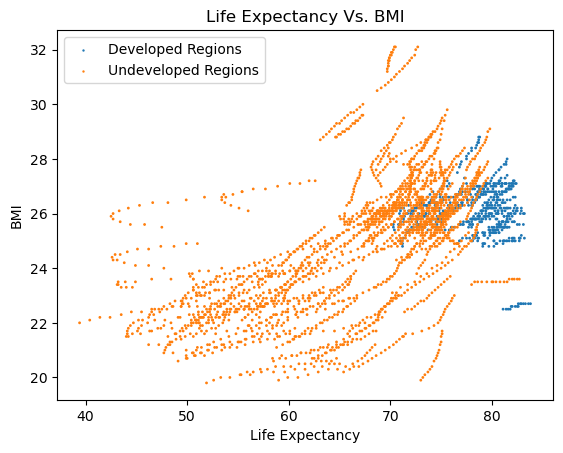

,Infant Deaths,Under Five Deaths,Adult Mortality,Alcohol Consumption,Hepatitis B,Measles,BMI,Polio,Diphtheria,Incidents HIV,GDP per capita,Population (Millions),Years of Schooling,Life Expectancy
count,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00,2864.00
mean,30.36,42.94,192.25,4.82,84.29,77.34,25.03,86.50,86.27,0.89,11540.92,36.68,7.63,68.86
std,27.54,44.57,114.91,3.98,16.00,18.66,2.19,15.08,15.53,2.38,16934.79,136.49,3.17,9.41
min,1.80,2.30,49.38,0.00,12.00,10.00,19.80,8.00,16.00,0.01,148.00,0.08,1.10,39.40
25%,8.10,9.67,106.91,1.20,78.00,64.00,23.20,81.00,81.00,0.08,1415.75,2.10,5.10,62.70
50%,19.60,23.10,163.84,4.02,89.00,83.00,25.50,93.00,93.00,0.15,4217.00,7.85,7.80,71.40
75%,47.35,66.00,246.79,7.78,96.00,93.00,26.40,97.00,97.00,0.46,12557.00,23.69,10.30,75.40
max,138.10,224.90,719.36,17.87,99.00,99.00,32.10,99.00,99.00,21.68,112418.00,1379.86,14.10,83.80


In [9]:
#scatter plot for BMI vs Life Expectancy
#compare results to undeveloping and developing
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['BMI'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions')
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['BMI'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions')
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy Vs. BMI')
plt.legend(loc = 'upper left')
plt.show()# Summary Statistics -- add in other columns of interest -- figure out how to round numbers
# dataset includes 179 countries, data from 16 years (2000-2015)

sum_stats = life_expectancy[['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Schooling', 'Life_expectancy']].describe()
sum_stats.rename(columns={'Infant_deaths':'Infant Deaths', 'Under_five_deaths':'Under Five Deaths',
                          'Adult_mortality':'Adult Mortality', 'Alcohol_consumption':'Alcohol Consumption', 
                          'Hepatitis_B':'Hepatitis B', 'Incidents_HIV':'Incidents HIV', 
                          'GDP_per_capita':'GDP per capita','Population_mln':'Population (Millions)',
                          'Schooling':'Years of Schooling', 'Life_expectancy':'Life Expectancy'},inplace=True)
sum_stats = sum_stats.round(2)
sum_stats


In [10]:
sum_stats.to_csv('summarystats.csv')

In [11]:
#range = $0 to $112,418 for Developed Countries
size_bins = [0, 5000, 10000, 25000, 50000, 75000, 115000]
category_labels = ["<$5,000", "$5,000-$10,000", "$10,000-$25,000","$25,000-$50,000","$50,000-$75,000","$75,000-$115,000"]

developed["GDP Ranges"] = pd.cut(developed["GDP_per_capita"],
                                                             size_bins, labels = category_labels)
developed_gdp_ranges = developed.groupby("GDP Ranges").mean(numeric_only = True)
developed_gdp_ranges.reset_index(inplace = True)
developed_gdp_ranges

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/839203528.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed["GDP Ranges"] = pd.cut(developed["GDP_per_capita"],


,GDP Ranges,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,"<$5,000",2001.571429,14.442857,17.357143,163.055000,10.688571,94.428571,88.571429,25.242857,95.714286,95.571429,0.028571,4383.714286,12.012857,2.814286,2.942857,9.885714,1.0,0.0,71.785714
1,"$5,000-$10,000",2005.388889,9.272222,11.053704,162.483398,10.400185,95.907407,94.407407,25.833333,95.500000,95.685185,0.060741,7783.833333,14.250370,2.533333,2.659259,10.714815,1.0,0.0,73.066667
2,"$10,000-$25,000",2008.372881,4.623729,5.540678,114.559331,11.090847,92.661017,91.141243,26.383616,95.661017,95.875706,0.079774,16377.564972,7.982994,1.527119,1.528814,10.944633,1.0,0.0,76.864407
3,"$25,000-$50,000",2007.084942,3.867181,4.702317,74.636098,9.433012,81.938224,85.625483,25.882239,94.447876,94.617761,0.079228,38694.864865,36.039421,0.918533,0.864479,11.453668,1.0,0.0,80.267954
4,"$50,000-$75,000",2008.800000,4.023077,4.803077,77.016023,8.894769,89.753846,87.615385,26.533846,92.907692,93.276923,0.063231,58374.030769,67.899846,0.798462,0.689231,12.430769,1.0,0.0,80.106154
5,"$75,000-$115,000",2008.300000,3.226667,3.850000,69.070150,10.946667,90.333333,84.300000,25.620000,96.700000,97.033333,0.073333,92484.533333,3.696667,0.753333,0.676667,12.106667,1.0,0.0,80.866667


In [12]:
undeveloped["GDP Ranges"] = pd.cut(undeveloped['GDP_per_capita'],size_bins,labels=category_labels)
undeveloped.groupby('GDP Ranges').mean().reset_index(inplace=True)
undeveloped

/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/1327562633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undeveloped["GDP Ranges"] = pd.cut(undeveloped['GDP_per_capita'],size_bins,labels=category_labels)
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/1327562633.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  undeveloped.groupby('GDP Ranges').mean().reset_index(inplace=True)


,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,"$10,000-$25,000"
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,"<$5,000"
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,"<$5,000"
5,Costa Rica,Central America and Caribbean,2006,9.8,11.2,95.2200,4.190,88,86,26.4,...,0.16,9110,4.35,2.0,1.9,7.9,0,1,78.2,"$5,000-$10,000"
6,Russian Federation,Rest of Europe,2015,6.6,8.2,223.0000,8.060,97,97,26.2,...,0.08,9313,144.10,2.3,2.3,12.0,0,1,71.2,"$5,000-$10,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,Belarus,Rest of Europe,2000,9.9,12.7,239.7160,12.920,70,92,25.7,...,0.05,2617,9.98,2.7,2.8,8.9,0,1,68.9,"<$5,000"
2858,"Iran, Islamic Rep.",Middle East,2007,19.7,23.1,129.9335,0.023,97,65,25.6,...,0.14,5305,71.34,7.5,7.8,8.9,0,1,72.6,"$5,000-$10,000"
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9,"<$5,000"
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9,"<$5,000"


In [13]:
life_expectancy["GDP Ranges"] = pd.cut(life_expectancy['GDP_per_capita'],size_bins,labels=category_labels)
life_expectancy

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5,"$10,000-$25,000"
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8,"$25,000-$50,000"
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4,"<$5,000"
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0,"<$5,000"
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7,"$25,000-$50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9,"<$5,000"
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9,"<$5,000"
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3,"<$5,000"
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8,"$5,000-$10,000"


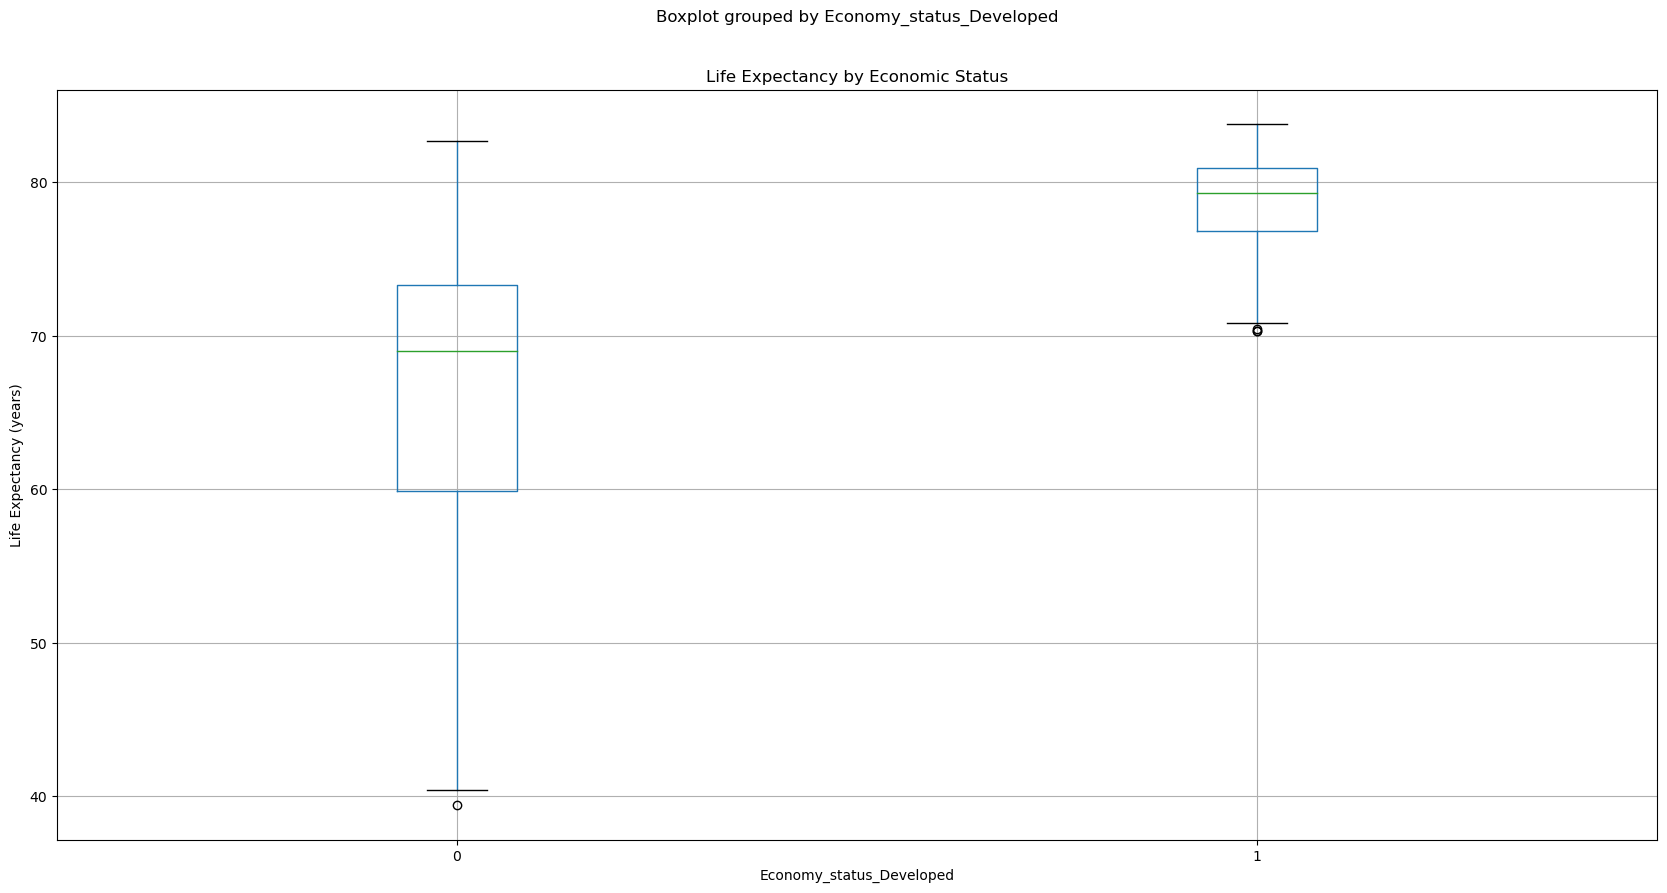

Ttest_indResult(statistic=14.682989783152696, pvalue=4.909578482162658e-31)

In [14]:
# LIFE EXPECTANCY BY REGION (T-TEST)
life_expectancy.boxplot('Life_expectancy', by = 'Economy_status_Developed', figsize=(20,10))
plt.title('Life Expectancy by Economic Status')
plt.ylabel('Life Expectancy (years)')
plt.savefig('life_expect_dev.png')
plt.show()

developed_ttest = life_expectancy.query('Economy_status_Developing==0&Year==2015')['Life_expectancy']
undeveloped_ttest = life_expectancy.query('Economy_status_Developing==1&Year==2015')['Life_expectancy']
stats.ttest_ind(developed_ttest,undeveloped_ttest,equal_var=False)

In [22]:
# Regroup by quartiles
gdp_bins = [0, 1416, 4218, 12558, 112418]

labels = ["<1416", "1416-4218", "4218-12558", "12558-112418"]
developed["Quartile GDP Ranges"] = pd.cut(developed['GDP_per_capita'],gdp_bins,labels=labels)
developed.groupby('Quartile GDP Ranges').mean().reset_index(inplace=True)
undeveloped["Quartile GDP Ranges"] = pd.cut(undeveloped['GDP_per_capita'],gdp_bins,labels=labels)
life_expectancy["Quartile GDP Ranges"] = pd.cut(life_expectancy['GDP_per_capita'],gdp_bins,labels=labels)

# LIFE EXPECTANCY BY REGION (T-TEST)
gdp_developed_mean = life_expectancy.query('Economy_status_Developed==1')['GDP_per_capita'].mean()
print(gdp_developed_mean)
gdp_undeveloped_mean = life_expectancy.query('Economy_status_Developed==0')['GDP_per_capita'].mean()
print(gdp_undeveloped_mean)

stats.ttest_ind(life_expectancy.query('Economy_status_Developed==1')['GDP_per_capita'],
                life_expectancy.query('Economy_status_Developed==0')['GDP_per_capita'],equal_var=False)

33683.5472972973
5771.368397887324


/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/3019047363.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  developed["Quartile GDP Ranges"] = pd.cut(developed['GDP_per_capita'],gdp_bins,labels=labels)
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/3019047363.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  developed.groupby('Quartile GDP Ranges').mean().reset_index(inplace=True)
/var/folders/tf/jtj87yg57613h56rlkc7jv0w0000gn/T/ipykernel_18728/3019047363.py:7: SettingWithCopyWarning: 
A value is trying to be set on a

Ttest_indResult(statistic=31.127797009853566, pvalue=9.317764506610166e-131)

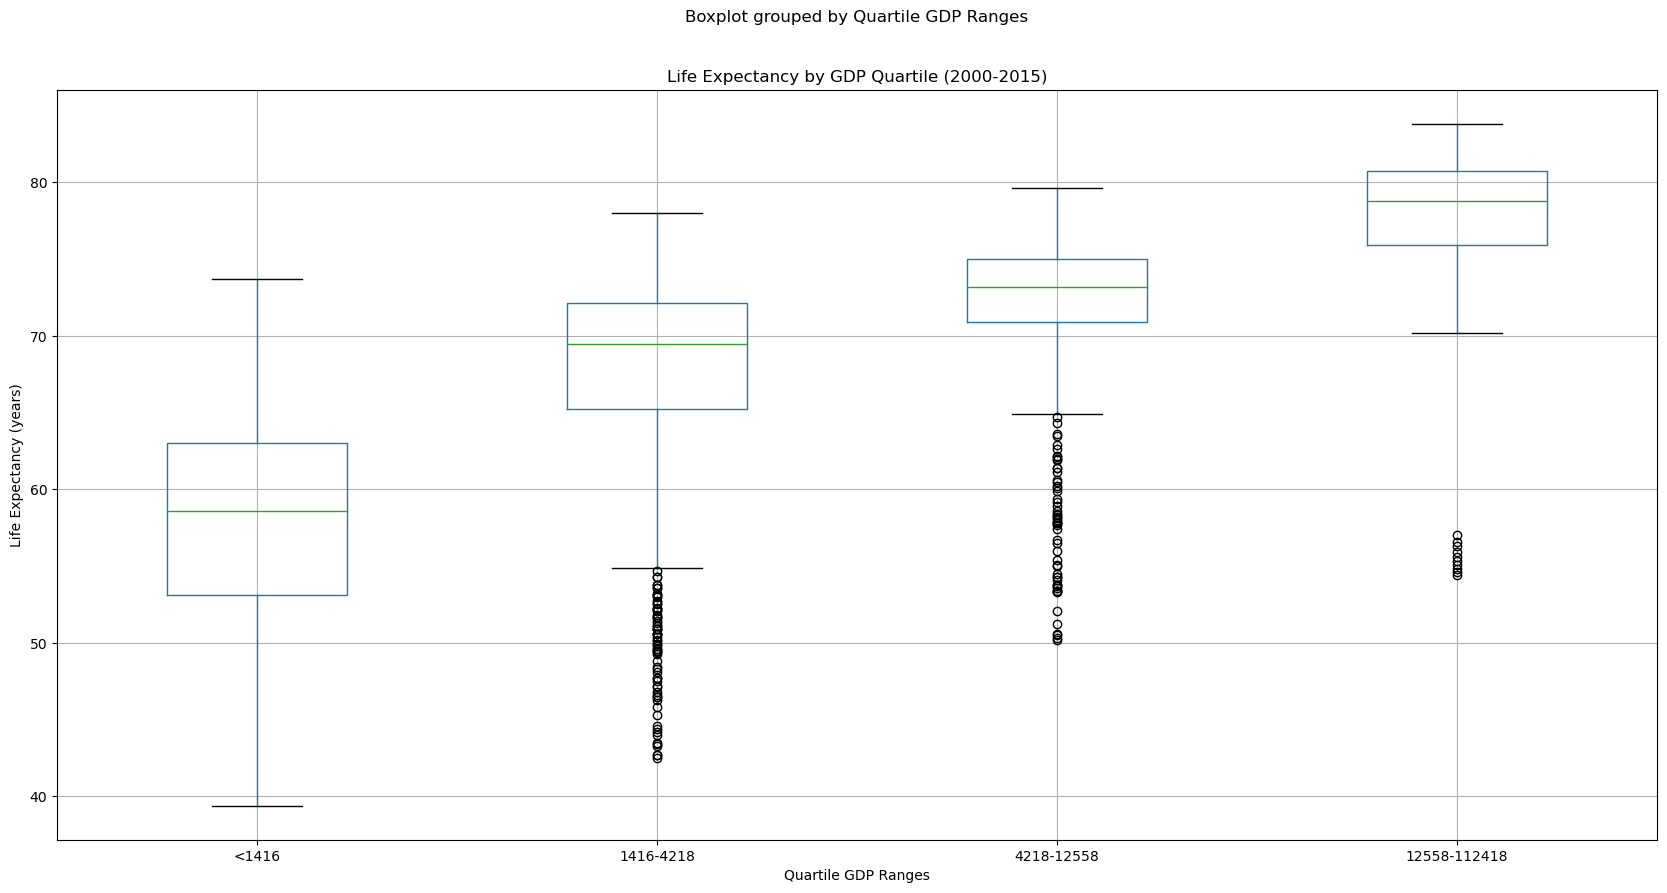

F_onewayResult(statistic=625.4755890129329, pvalue=1.045725475514985e-214)


In [23]:
# LIFE EXPECTANCY vs. GDP RANGES (ANOVA)
life_expectancy.boxplot('Life_expectancy', by = 'Quartile GDP Ranges', figsize=(20,10))
plt.title('Life Expectancy by GDP Quartile (2000-2015)')
plt.ylabel('Life Expectancy (years)')
plt.savefig('life_expect_gdp.png')
plt.show()

# Extract individual groups
group0 = life_expectancy[life_expectancy['Quartile GDP Ranges']=="<1416"]['Life_expectancy']
group1 = life_expectancy[life_expectancy['Quartile GDP Ranges']=="1416-4218"]['Life_expectancy']
group2 = life_expectancy[life_expectancy['Quartile GDP Ranges']=="4218-12558"]['Life_expectancy']
group3 = life_expectancy[life_expectancy['Quartile GDP Ranges']=="12558-112418"]['Life_expectancy']

# ANOVA Test
print(stats.f_oneway(group1,group2,group3))

In [17]:
# By country, in 2015? 
twentyfifteen = life_expectancy.query('Year==2015')
twentyfifteen_region = twentyfifteen.groupby('Region').mean().reset_index()

/var/folders/xl/xk0yxcr97yv5qf0v1jxr20p80000gn/T/ipykernel_5536/3079361763.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twentyfifteen_region = twentyfifteen.groupby('Region').mean().reset_index()


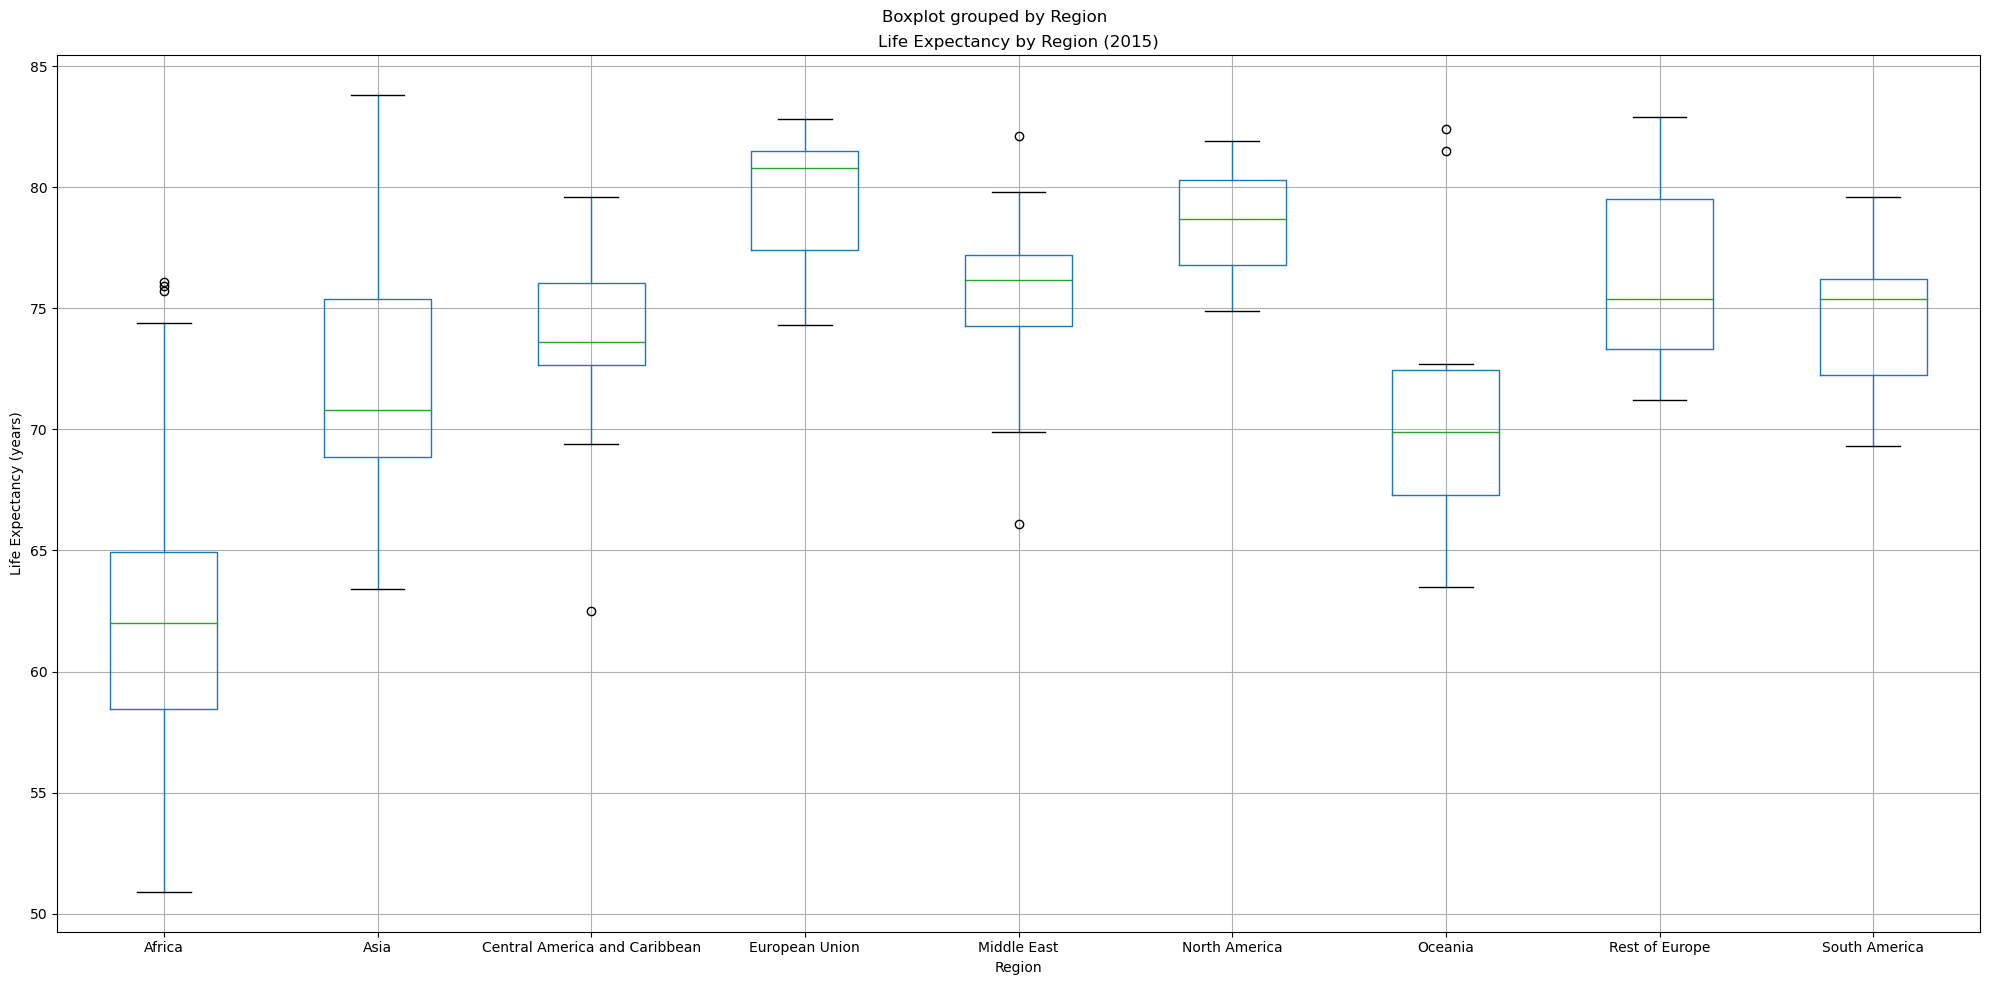

F_onewayResult(statistic=29.12907375646511, pvalue=9.427455249816252e-14)
F_onewayResult(statistic=6.084491177201229, pvalue=0.0003136531814695706)
Ttest_indResult(statistic=-16.210284856011086, pvalue=4.1670091577619766e-26)
Ttest_indResult(statistic=-4.355514075379879, pvalue=0.0005256852585791375)
Ttest_indResult(statistic=0.48245595292856824, pvalue=0.6715245848039528)


In [18]:
twentyfifteen.boxplot('Life_expectancy', by = 'Region', figsize=(20,10))
plt.title('Life Expectancy by Region (2015)')
plt.ylabel('Life Expectancy (years)')
plt.tight_layout()
plt.savefig('2015_regional_boxplot.png')
plt.show()

# Extract individual groups
africa = twentyfifteen[twentyfifteen['Region']=="Africa"]['Life_expectancy']
asia = twentyfifteen[twentyfifteen['Region']=="Asia"]['Life_expectancy']
cacaribbean = twentyfifteen[twentyfifteen['Region']=="Central America and Caribbean"]['Life_expectancy']
europeanunion = twentyfifteen[twentyfifteen['Region']=="European Union"]['Life_expectancy']
middleeast = twentyfifteen[twentyfifteen['Region']=="Middle East"]['Life_expectancy']
northamerica = twentyfifteen[twentyfifteen['Region']=="North America"]['Life_expectancy']
oceania = twentyfifteen[twentyfifteen['Region']=="Oceania"]['Life_expectancy']
restofeurope = twentyfifteen[twentyfifteen['Region']=="Rest of Europe"]['Life_expectancy']
southamerica = twentyfifteen[twentyfifteen['Region']=="South America"]['Life_expectancy']

# ANOVA Test under 75 vs over 
print(stats.f_oneway(africa,oceania,asia,cacaribbean))
print(stats.f_oneway(europeanunion,middleeast,northamerica,southamerica,restofeurope))

# T-test (lowest/highest,lowest/second lowest, highest/second highest)
print(stats.ttest_ind(africa,europeanunion,equal_var=False))
print(stats.ttest_ind(africa,oceania,equal_var=False))
print(stats.ttest_ind(europeanunion,northamerica,equal_var=False))

In [19]:
twentyfifteen_region['Life_expectancy'].mean()

73.74065236041844

In [20]:
# Set up expected values for expected life expectancy values
twentyfifteen_region['Expected LE']=[73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184,
                                    73.7406523604184,73.7406523604184,73.7406523604184,73.7406523604184]
print(twentyfifteen_region['Expected LE'].sum())
print(twentyfifteen_region['Life_expectancy'].sum())


663.6658712437655
663.665871243766


In [21]:
# CHI SQUARE: LIFE EXPECTANCY BY REGION IN 2015 
stats.chisquare(twentyfifteen_region['Life_expectancy'],twentyfifteen_region['Expected LE'])

Power_divergenceResult(statistic=2.7475816130544928, pvalue=0.9491862036856972)

In [22]:
developed = life_expectancy.query('Economy_status_Developed==1')
developed_by_region = developed.groupby('Region').nunique().reset_index()
developed_by_region

undeveloped = life_expectancy.query('Economy_status_Developing == 1')
undeveloped_by_region = undeveloped.groupby('Region').nunique().reset_index()
undeveloped_by_region

,Region,Country,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,GDP Ranges
0,Africa,51,16,558,620,816,467,67,57,95,...,382,705,681,111,111,88,1,1,282,3
1,Asia,26,16,299,319,411,292,58,79,72,...,51,405,391,166,172,94,1,1,179,5
2,Central America and Caribbean,19,16,194,216,304,257,33,40,61,...,96,303,188,53,55,80,1,1,135,4
3,Middle East,13,16,138,145,208,130,41,46,63,...,14,207,201,47,49,71,1,1,104,5
4,North America,1,16,16,16,16,15,7,11,13,...,2,16,16,6,5,10,1,1,7,1
5,Oceania,9,16,113,121,144,109,48,33,81,...,23,140,70,26,25,69,1,1,96,2
6,Rest of Europe,11,16,112,123,174,158,40,30,27,...,40,175,116,25,25,54,1,1,93,2
7,South America,12,16,149,155,192,172,34,47,34,...,41,190,168,33,33,45,1,1,106,3


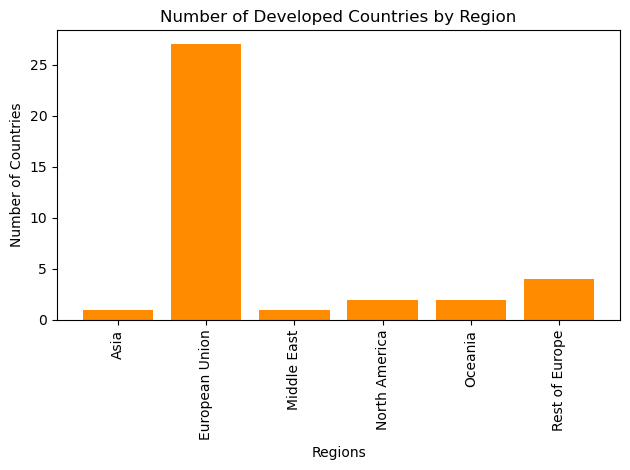

In [23]:
#Graph for Developed Countries by Region
#Bar Chart

plt.bar(developed_by_region['Region'],developed_by_region['Country'], align="center", color = "darkorange")
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Number of Countries")
plt.title("Number of Developed Countries by Region")
plt.tight_layout()
plt.savefig("developed_countries_count.png")
plt.show()


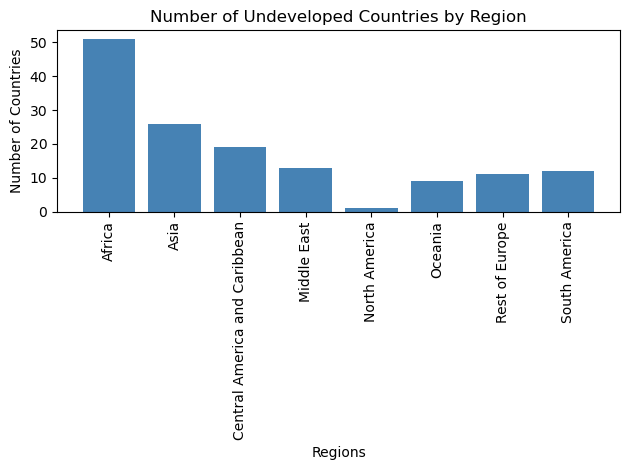

In [24]:
#Graph for Undeveloped Countries by Region
#Bar Chart

plt.bar(undeveloped_by_region['Region'],undeveloped_by_region['Country'], align="center", color = "steelblue")
plt.xticks(rotation = 90)
plt.xlabel("Regions")
plt.ylabel("Number of Countries")
plt.title("Number of Undeveloped Countries by Region")
plt.tight_layout()
plt.savefig("undeveloped_countries_count.png")
plt.show()

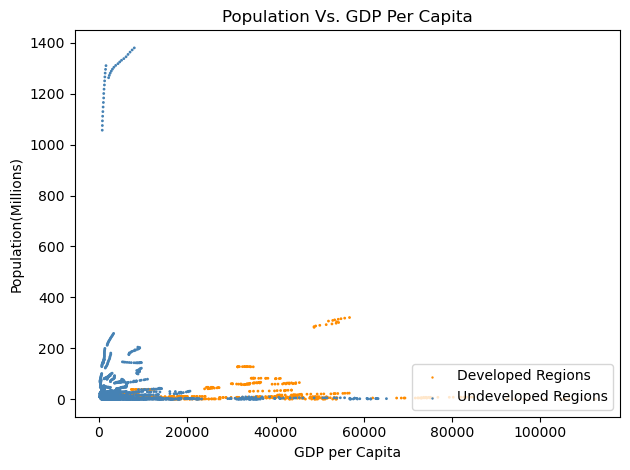

In [25]:
#Scatter Plot for Population vs GDP Per Capita
plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Population_mln'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions',color = "darkorange")
plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Population_mln'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions', color = "steelblue")
plt.xlabel('GDP per Capita')
plt.ylabel('Population(Millions)')
plt.title('Population Vs. GDP Per Capita')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("population_vs_gdp.png")
plt.show()

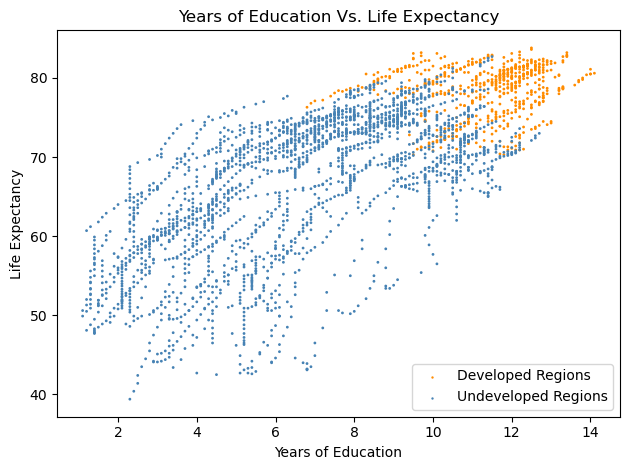

In [26]:
#scatter plot for GDP per Capita vs Life Expectancy
#compare results to undeveloping and developing
plt.scatter(life_expectancy['Schooling'],life_expectancy['Life_expectancy'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions',color = "darkorange")
plt.scatter(life_expectancy['Schooling'],life_expectancy['Life_expectancy'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions', color = "steelblue")
plt.xlabel('Years of Education')
plt.ylabel('Life Expectancy')
plt.title('Years of Education Vs. Life Expectancy')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("education_vs_life_expectancy.png")

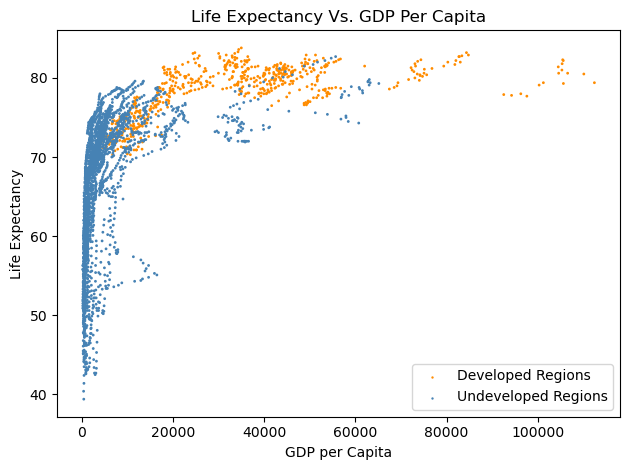

In [27]:
#scatter plot for GDP per Capita vs Life Expectancy
#compare results to undeveloping and developing
plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Life_expectancy'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions',color = "darkorange")
plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Life_expectancy'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions', color = "steelblue")
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Vs. GDP Per Capita')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("gdp_vs_life_expectancy.png")
plt.show()

In [28]:
#created a new dataframe to group by gdp ranges
gdp_ranges_df=life_expectancy.groupby(["GDP Ranges", "Economy_status_Developed"])["Life_expectancy"].mean().reset_index()

/var/folders/xl/xk0yxcr97yv5qf0v1jxr20p80000gn/T/ipykernel_5536/2981320614.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]


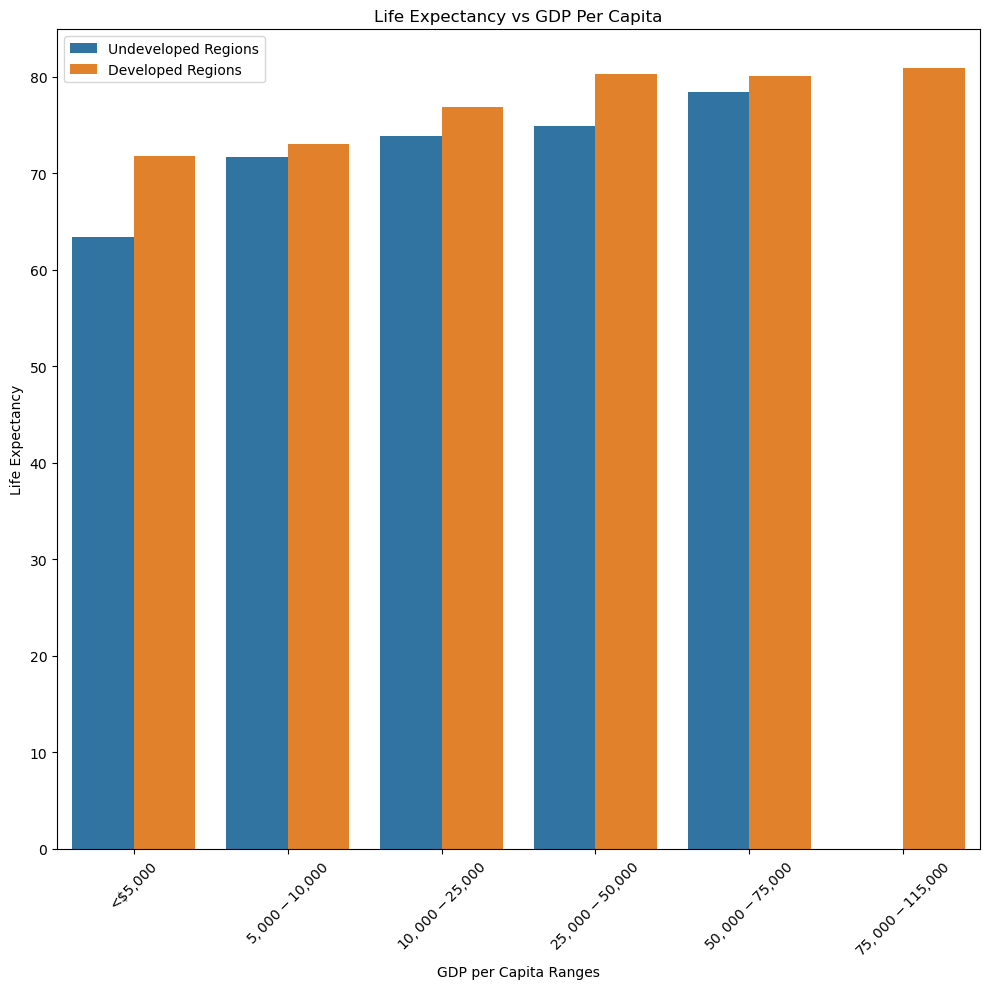

In [29]:
#creating a bar graph to look at life expectancy vs gdp ranges

plt.figure(figsize = (10,10))
ax = sns.barplot(data = gdp_ranges_df, x = "GDP Ranges", y = "Life_expectancy", hue = "Economy_status_Developed")
handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]
plt.legend(handles = handles, labels = labels)
plt.xticks(rotation = 45)
plt.title("Life Expectancy vs GDP Per Capita")
plt.xlabel('GDP per Capita Ranges')
plt.ylabel('Life Expectancy')
plt.tight_layout()
plt.savefig("life_expectancy_vs_gdp.png")
plt.show()

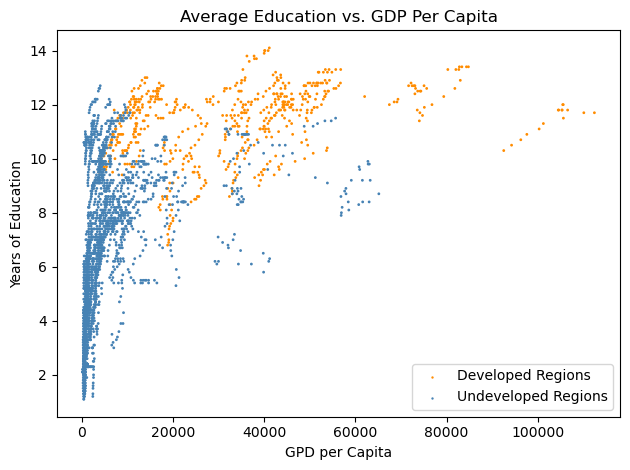

In [30]:
#Average Education vs GDP Per Capita

plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Schooling'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions', color = "darkorange")
plt.scatter(life_expectancy['GDP_per_capita'],life_expectancy['Schooling'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions', color = "steelblue")
plt.xlabel('GPD per Capita')
plt.ylabel('Years of Education')
plt.title('Average Education vs. GDP Per Capita')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("education_vs_gdp.png")
plt.show()

/var/folders/xl/xk0yxcr97yv5qf0v1jxr20p80000gn/T/ipykernel_5536/197397140.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]


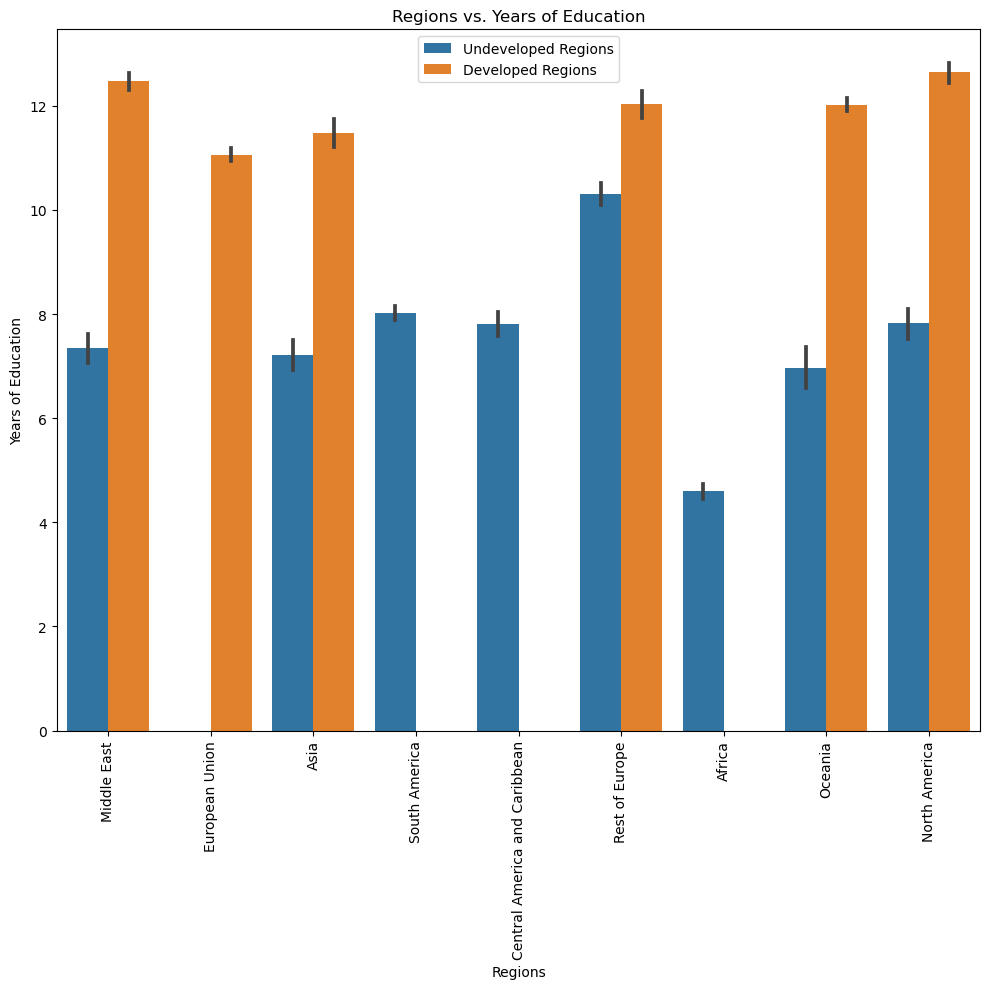

In [31]:
#bar plot for schooling in region

plt.figure(figsize = (10,10))
ax = sns.barplot(data = life_expectancy, x = "Region", y = "Schooling", hue = "Economy_status_Developed")
handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]
plt.legend(handles = handles, labels = labels)
plt.xticks(rotation = 90)
plt.title("Regions vs. Years of Education")
plt.xlabel('Regions')
plt.ylabel('Years of Education')
plt.tight_layout()
plt.savefig("regions_vs_education.png")
plt.show()

/var/folders/xl/xk0yxcr97yv5qf0v1jxr20p80000gn/T/ipykernel_5536/141234692.py:5: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]


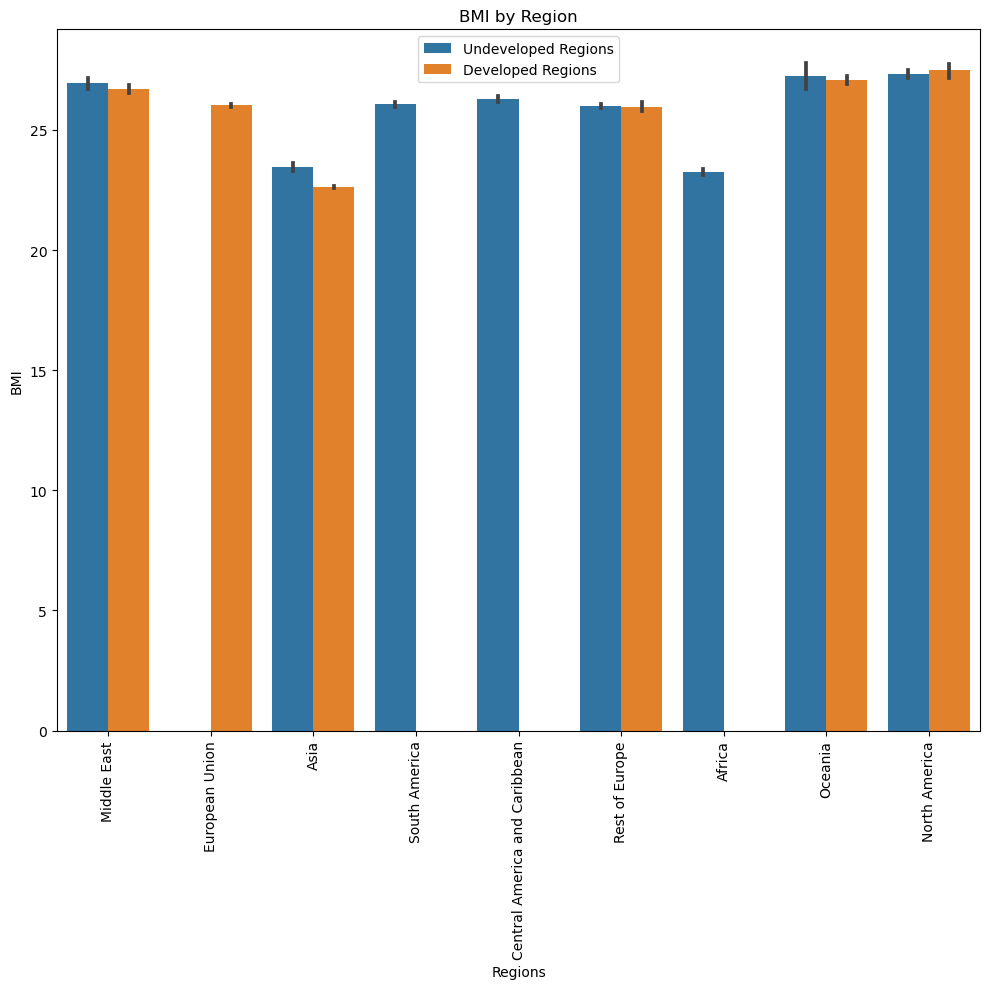

In [32]:
#Region vs BMI

plt.figure(figsize = (10,10))
ax = sns.barplot(data = life_expectancy, x = "Region", y = "BMI", hue = "Economy_status_Developed")
handles, labels = ax.get_legend().legendHandles, ["Undeveloped Regions", "Developed Regions"]
plt.legend(handles = handles, labels = labels)
plt.xticks(rotation = 90)
plt.title('BMI by Region')
plt.xlabel('Regions')
plt.ylabel('BMI')
plt.tight_layout()
plt.savefig("regions_vs_bmi.png")
plt.show()

In [33]:
#line chart for showing average life expectancy by region over time
life_expectancy_new_df = life_expectancy[['Region', 'Year','Life_expectancy']]
life_expectancy_new_df

life_expectancy_by_region = life_expectancy_new_df.groupby(["Region","Year"]).mean()
life_expectancy_by_region_df = life_expectancy_by_region.reset_index()

In [34]:
#Each region's life expectancy

life_expectancy_africa = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Africa"]
life_expectancy_me = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Middle East"]
life_expectancy_eu = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "European Union"]
life_expectancy_asia = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Asia"]
life_expectancy_sa = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "South America"]
life_expectancy_cac = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Central America and Caribbean"]
life_expectancy_rest_eu = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Rest of Europe"]
life_expectancy_ocean = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "Oceania"]
life_expectancy_na = life_expectancy_by_region_df.loc[life_expectancy_by_region_df['Region'] == "North America"]

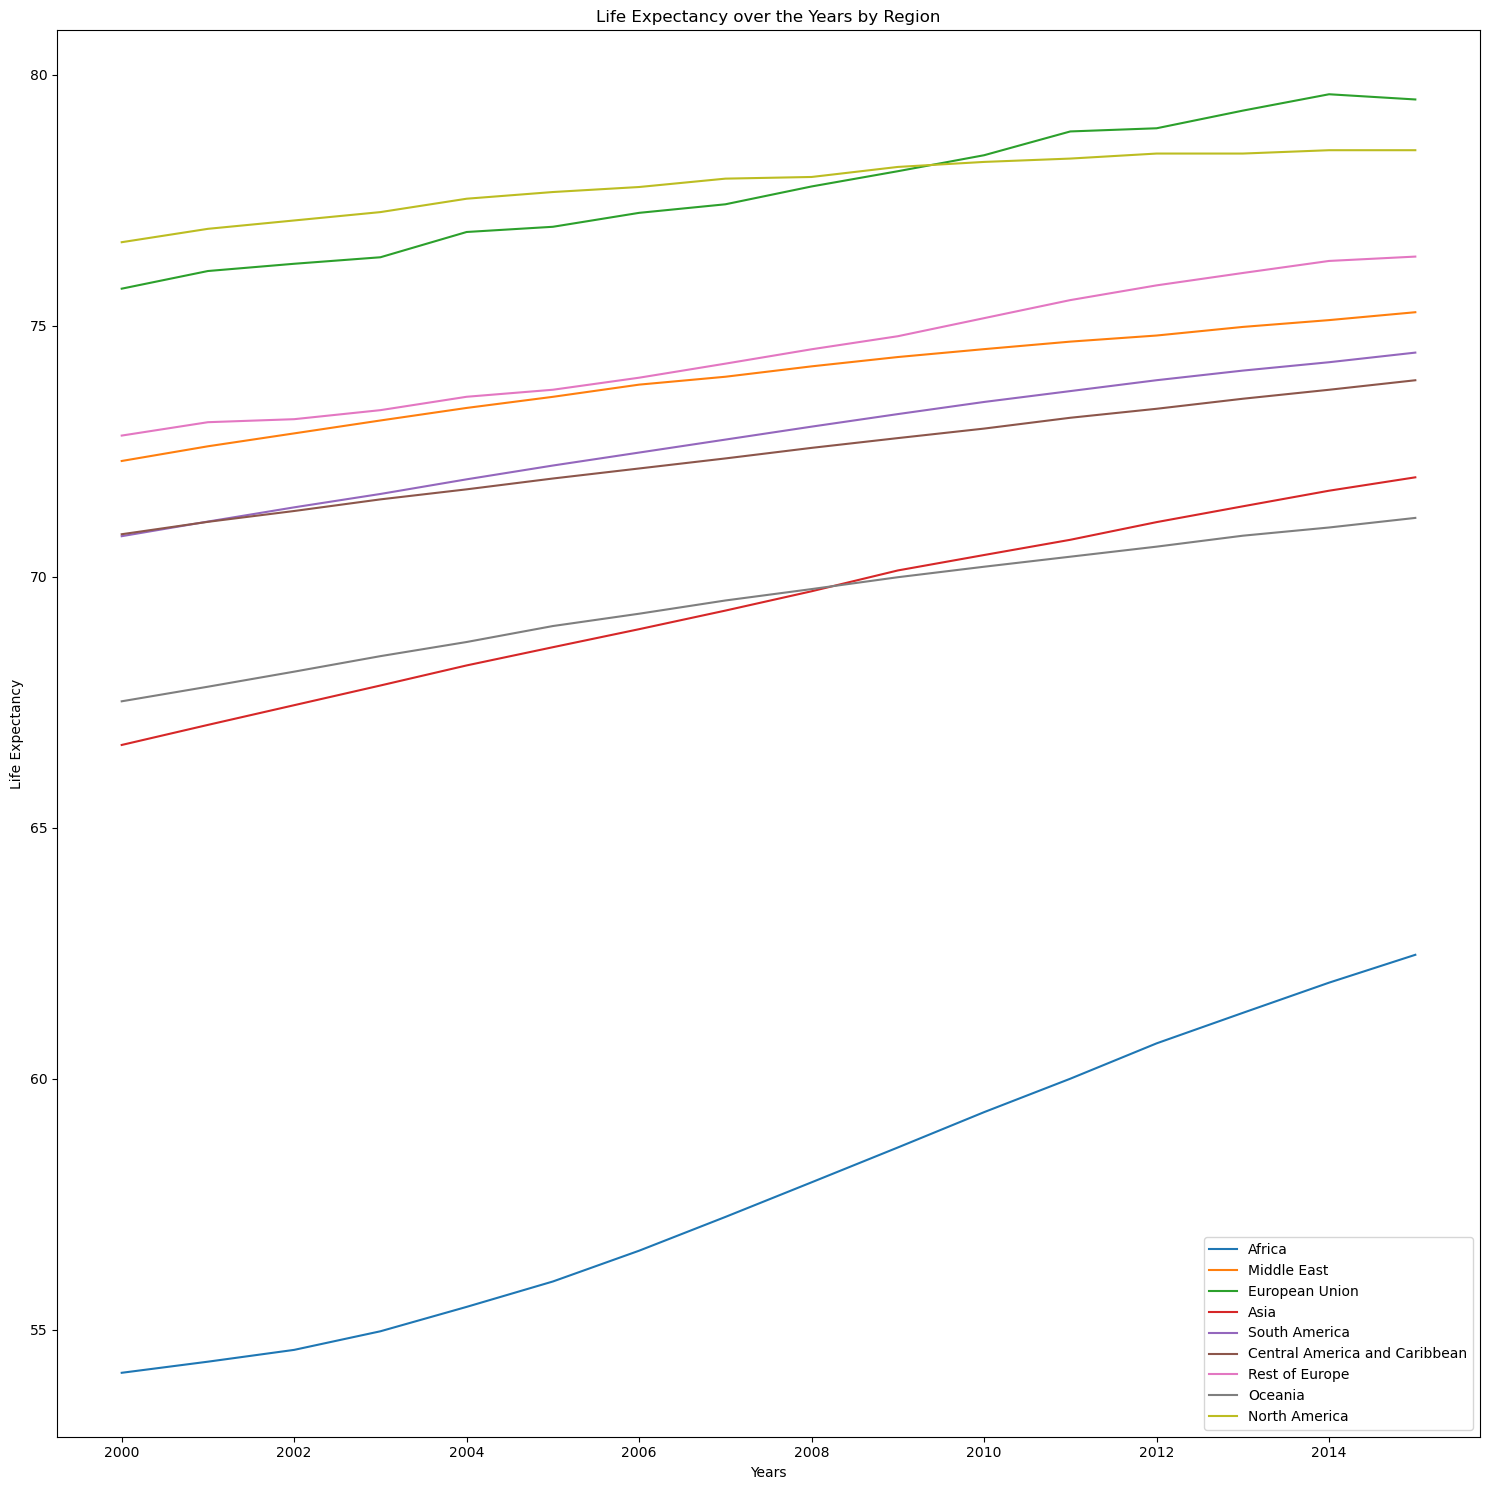

In [35]:
#line chart for showing average life expectancy by region over time

plt.figure(figsize = (15,15))
plt.plot(life_expectancy_africa['Year'],life_expectancy_africa['Life_expectancy'],label = "Africa")
plt.plot(life_expectancy_me['Year'],life_expectancy_me['Life_expectancy'], label = "Middle East")
plt.plot(life_expectancy_eu['Year'],life_expectancy_eu['Life_expectancy'], label = "European Union")
plt.plot(life_expectancy_asia['Year'],life_expectancy_asia['Life_expectancy'], label = "Asia")
plt.plot(life_expectancy_sa['Year'],life_expectancy_sa['Life_expectancy'], label = "South America")
plt.plot(life_expectancy_cac['Year'],life_expectancy_cac['Life_expectancy'], label = "Central America and Caribbean")
plt.plot(life_expectancy_rest_eu['Year'],life_expectancy_rest_eu['Life_expectancy'], label = "Rest of Europe")
plt.plot(life_expectancy_ocean['Year'],life_expectancy_ocean['Life_expectancy'], label = "Oceania")
plt.plot(life_expectancy_na['Year'],life_expectancy_na['Life_expectancy'], label = "North America")

plt.title("Life Expectancy over the Years by Region")
plt.xlabel("Years")
plt.ylabel("Life Expectancy")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("line_chart_life_expectancy.png")
plt.show()

In [36]:
#line chart for showing GDP per Capita by region over time

life_expectancy_gdp_df = life_expectancy[['Region', 'Year','GDP_per_capita']]
life_expectancy_gdp_df

gdp_by_region = life_expectancy_gdp_df.groupby(["Region","Year"]).mean()
gdp_by_region_df = gdp_by_region.reset_index()
gdp_by_region_df

,Region,Year,GDP_per_capita
0,Africa,2000,1890.784314
1,Africa,2001,1942.470588
2,Africa,2002,1971.274510
3,Africa,2003,2016.450980
4,Africa,2004,2113.607843
...,...,...,...
139,South America,2011,8257.083333
140,South America,2012,8587.916667
141,South America,2013,8778.166667
142,South America,2014,9136.666667


In [37]:
#Each Regions GDP Per Capita over the years
gdp_africa = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Africa"]
gdp_me = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Middle East"]
gdp_eu = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "European Union"]
gdp_asia = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Asia"]
gdp_sa = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "South America"]
gdp_cac = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Central America and Caribbean"]
gdp_rest_eu = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Rest of Europe"]
gdp_ocean = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "Oceania"]
gdp_na = gdp_by_region_df.loc[gdp_by_region_df['Region'] == "North America"]

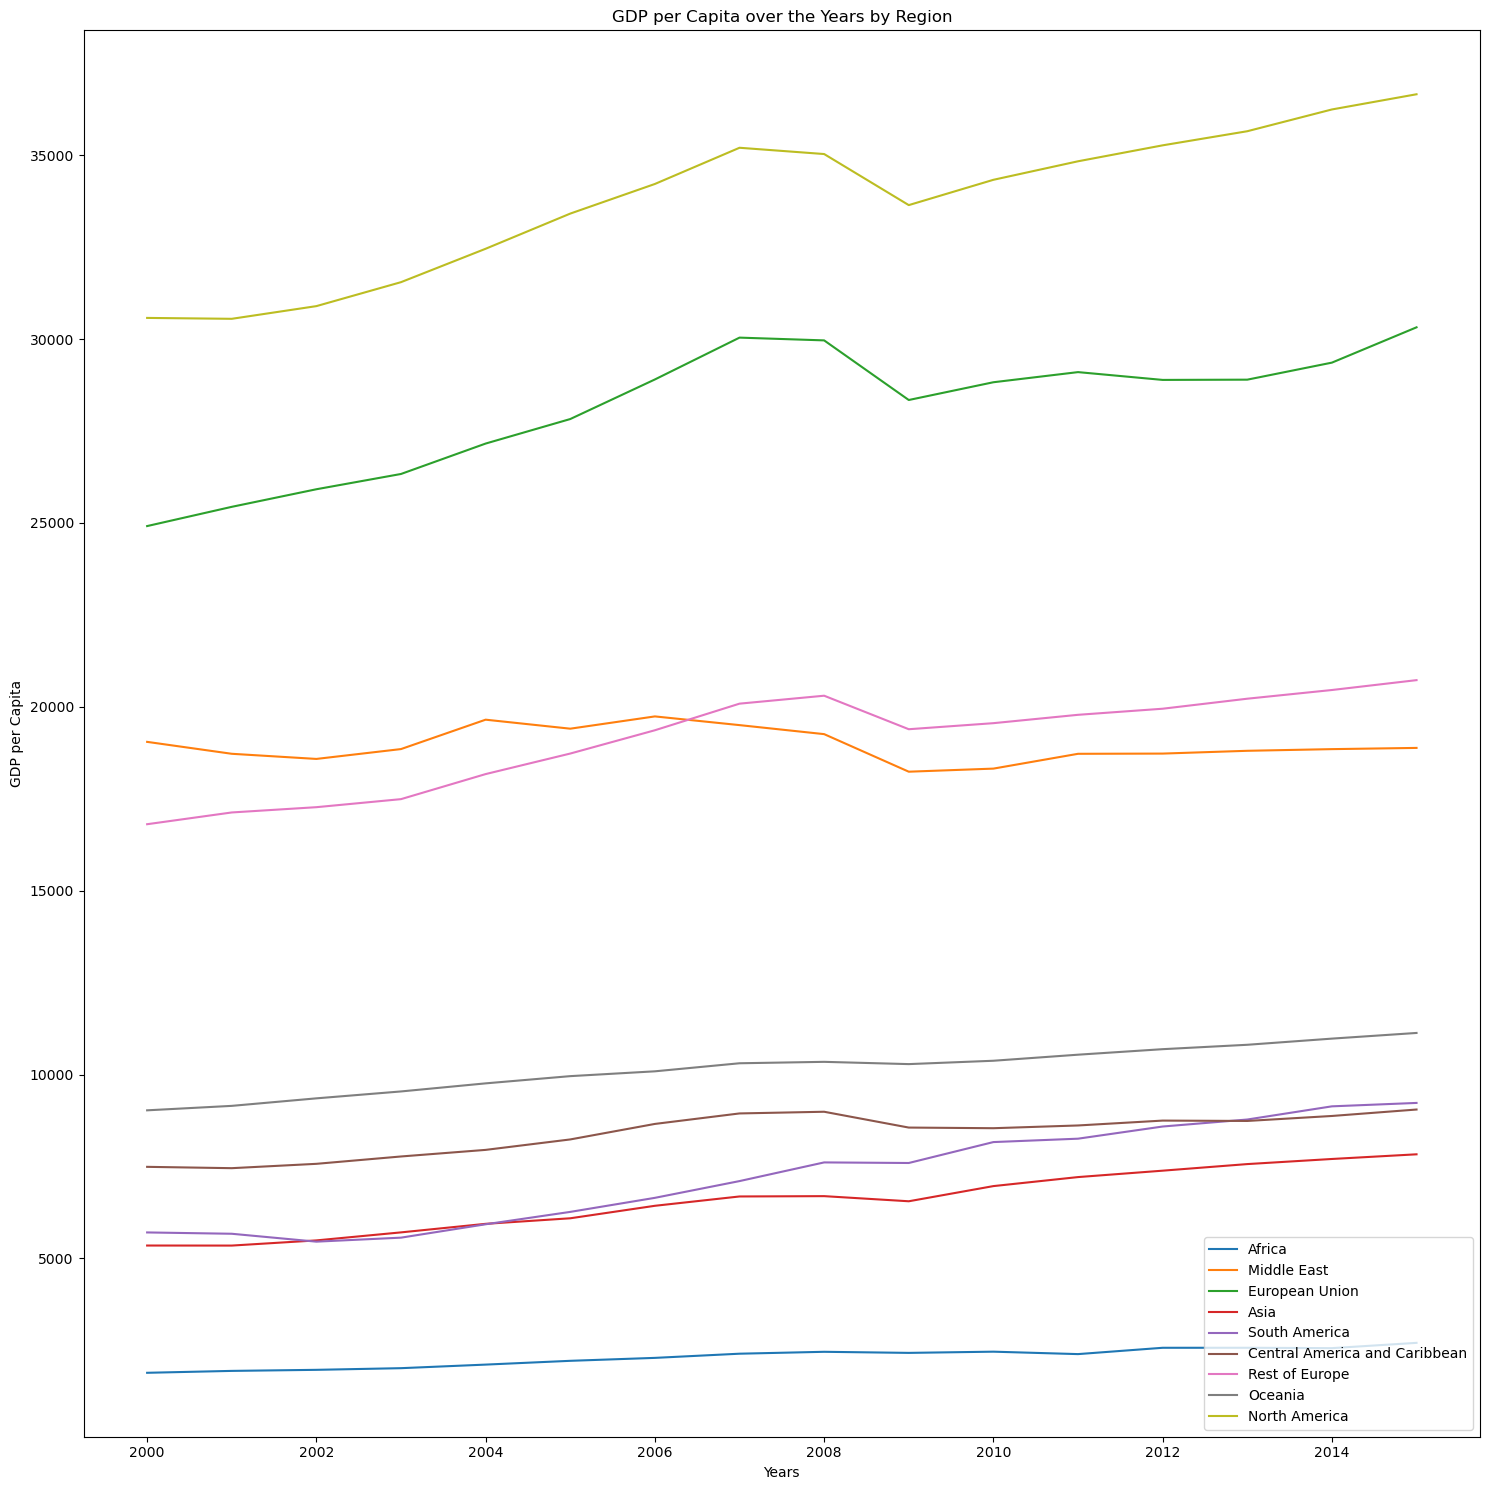

In [38]:
#line chart for showing average life expectancy by region over time

plt.figure(figsize = (15,15))
plt.plot(gdp_africa['Year'],gdp_africa['GDP_per_capita'],label = "Africa")
plt.plot(gdp_me['Year'],gdp_me['GDP_per_capita'], label = "Middle East")
plt.plot(gdp_eu['Year'],gdp_eu['GDP_per_capita'], label = "European Union")
plt.plot(gdp_asia['Year'],gdp_asia['GDP_per_capita'], label = "Asia")
plt.plot(gdp_sa['Year'],gdp_sa['GDP_per_capita'], label = "South America")
plt.plot(gdp_cac['Year'],gdp_cac['GDP_per_capita'], label = "Central America and Caribbean")
plt.plot(gdp_rest_eu['Year'],gdp_rest_eu['GDP_per_capita'], label = "Rest of Europe")
plt.plot(gdp_ocean['Year'],gdp_ocean['GDP_per_capita'], label = "Oceania")
plt.plot(gdp_na['Year'],gdp_na['GDP_per_capita'], label = "North America")

plt.title("GDP per Capita over the Years by Region")
plt.xlabel("Years")
plt.ylabel("GDP per Capita")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("line_chart_for_gdp.png")
plt.show()

In [39]:
#line chart for education comparison
life_expectancy_education = life_expectancy[['Region', 'Year','Schooling']]
life_expectancy_education

life_expectancy_education_df = life_expectancy_education.groupby(["Region","Year"]).mean()
life_expectancy_education_df = life_expectancy_education_df.reset_index()
life_expectancy_education_df

,Region,Year,Schooling
0,Africa,2000,3.949020
1,Africa,2001,4.005882
2,Africa,2002,4.109804
3,Africa,2003,4.174510
4,Africa,2004,4.264706
...,...,...,...
139,South America,2011,8.441667
140,South America,2012,8.483333
141,South America,2013,8.625000
142,South America,2014,8.758333


In [40]:
#education by region
education_africa = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Africa"]
education_me = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Middle East"]
education_eu = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "European Union"]
education_asia = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Asia"]
education_sa = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "South America"]
education_cac = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Central America and Caribbean"]
education_rest_eu = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Rest of Europe"]
education_ocean = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "Oceania"]
education_na = life_expectancy_education_df.loc[life_expectancy_education_df['Region'] == "North America"]

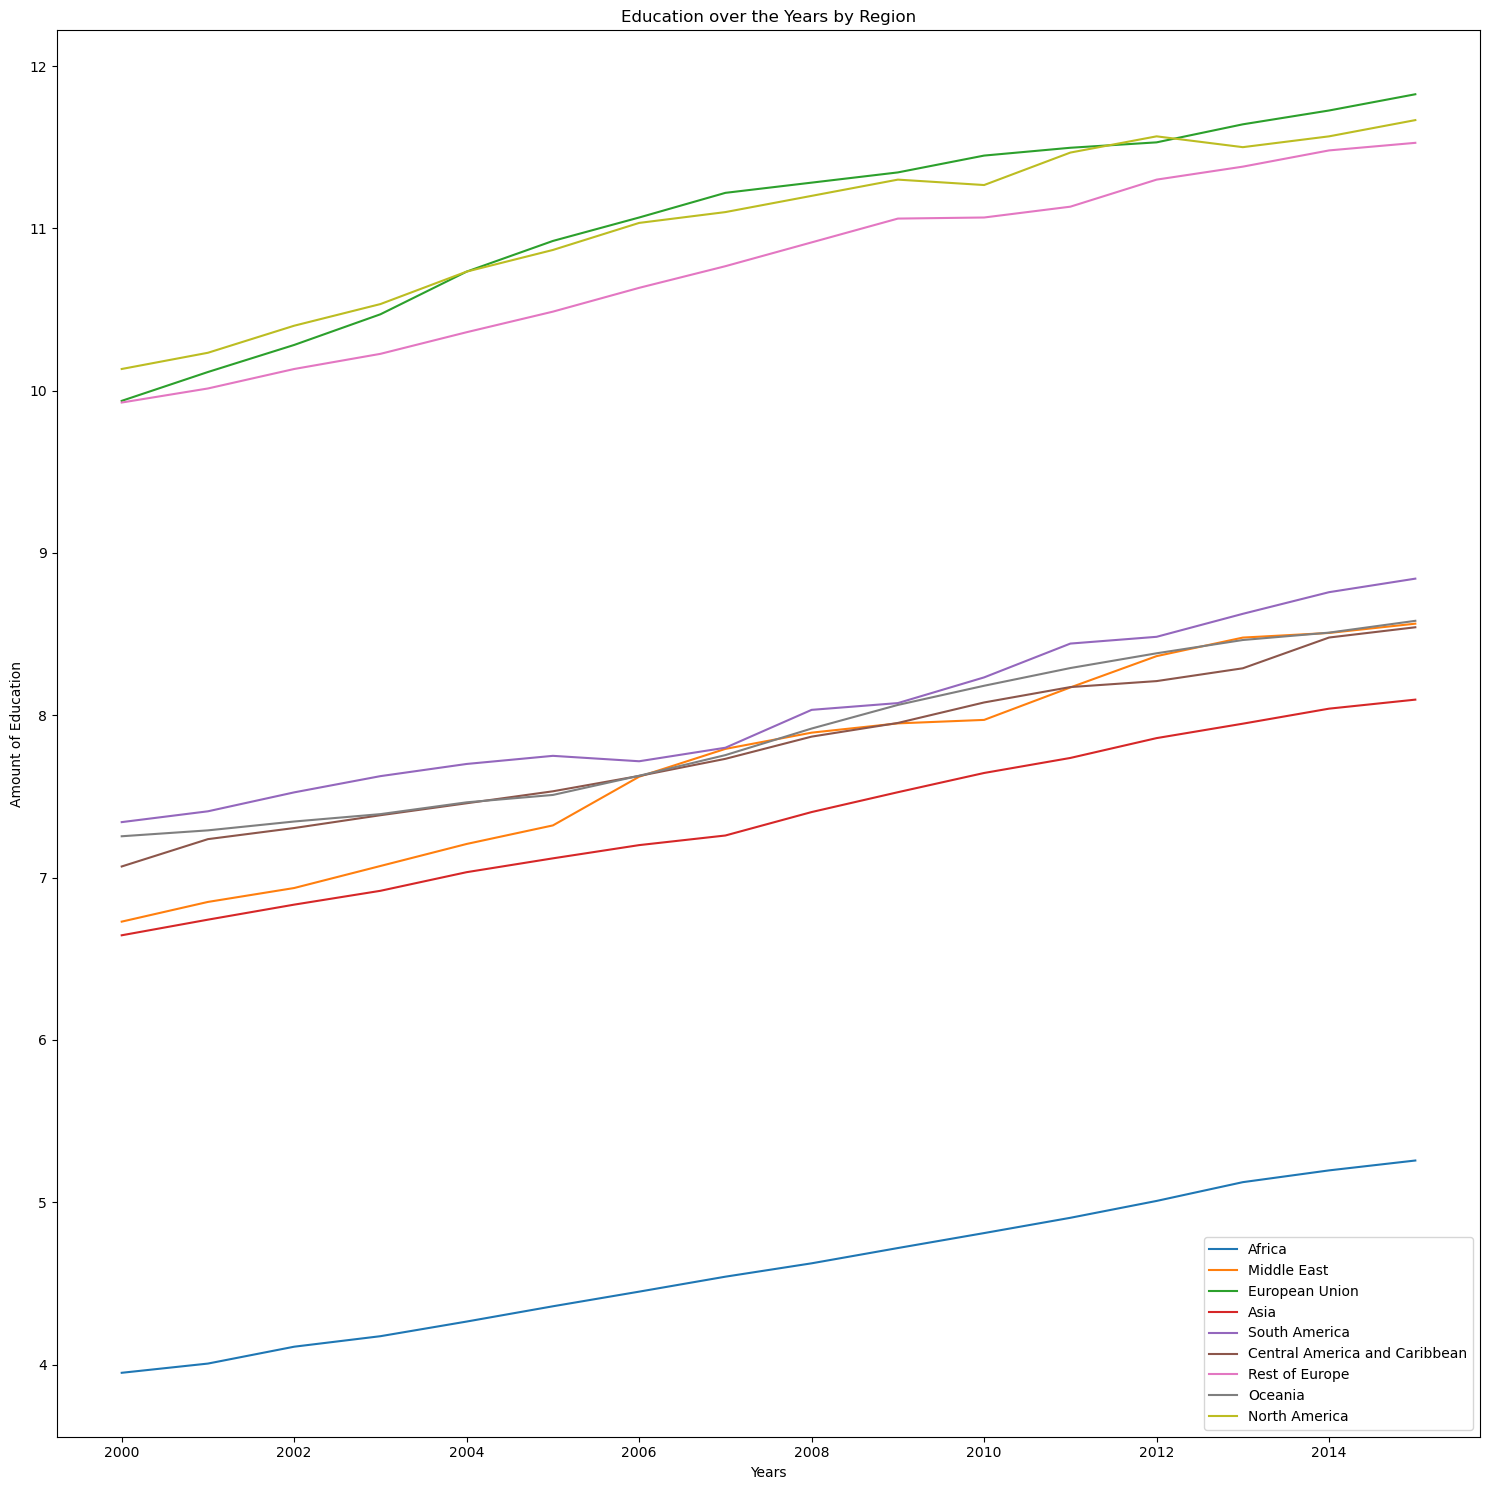

In [41]:
#line chart for education through the years
plt.figure(figsize = (15,15))
plt.plot(education_africa['Year'],education_africa['Schooling'],label = "Africa")
plt.plot(education_me['Year'],education_me['Schooling'], label = "Middle East")
plt.plot(education_eu['Year'], education_eu['Schooling'], label = "European Union")
plt.plot(education_asia['Year'],education_asia['Schooling'], label = "Asia")
plt.plot(education_sa['Year'],education_sa['Schooling'], label = "South America")
plt.plot(education_cac['Year'],education_cac['Schooling'], label = "Central America and Caribbean")
plt.plot(education_rest_eu['Year'],education_rest_eu['Schooling'], label = "Rest of Europe")
plt.plot(education_ocean['Year'],education_ocean['Schooling'], label = "Oceania")
plt.plot(education_na['Year'],education_na['Schooling'], label = "North America")

plt.title("Education over the Years by Region")
plt.xlabel("Years")
plt.ylabel("Amount of Education")
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.savefig("education_by_region.png")
plt.show()

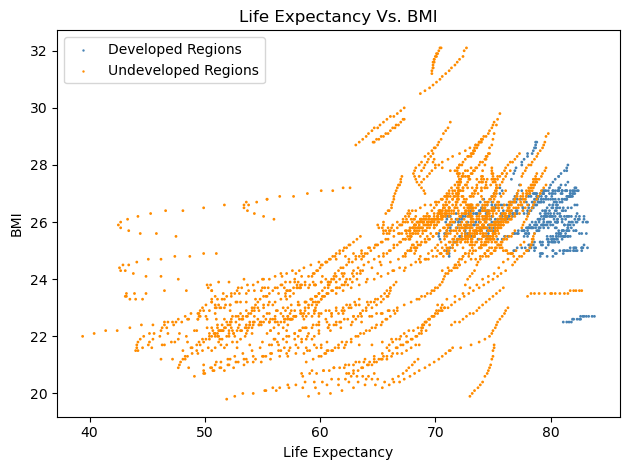

In [42]:
#scatter plot for BMI vs Life Expectancy
#compare results to undeveloping and developing
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['BMI'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions',color = "steelblue")
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['BMI'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions',color = "darkorange")
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy Vs. BMI')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("life_expectancy_vs_bmi.png")
plt.show()

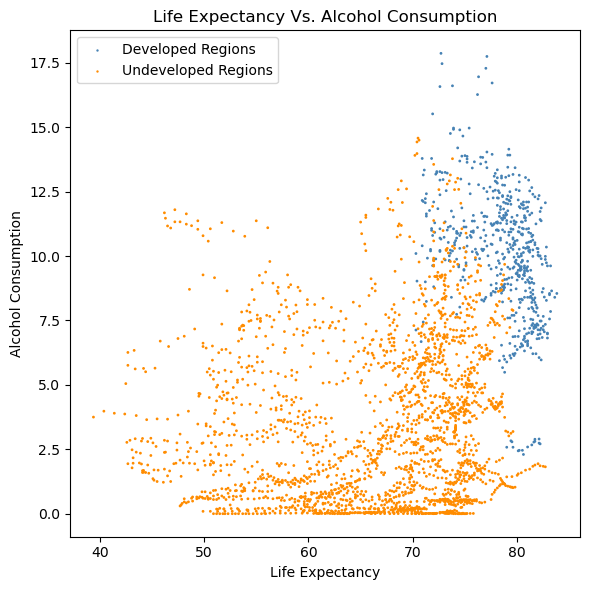

In [43]:
#scatter plot for Alcohol Consumption vs Life Expectancy
#compare results to undeveloping and developing
plt.figure(figsize = (6,6))
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['Alcohol_consumption'], life_expectancy['Economy_status_Developed'], label = 'Developed Regions',color = "steelblue")
plt.scatter(life_expectancy['Life_expectancy'],life_expectancy['Alcohol_consumption'], life_expectancy['Economy_status_Developing'], label = 'Undeveloped Regions',color = "darkorange")
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol Consumption')
plt.title('Life Expectancy Vs. Alcohol Consumption')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("alc_consumption_life_expectancy.png")
plt.show()